In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the GeoDataFrame with country geometries
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

<ipython-input-42-7ba0ba145ce6>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [43]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [44]:
ita = pd.read_csv('/content/RATEINF-CPI_ITA.csv')

f_val = ita[ita.Date == '2023-07-31'].Value[0]
i_val = ita[ita.Date == '2022-07-31'].Value[12]

inflation_rate_it = (f_val - i_val)/ i_val *100

In [45]:
jpn = pd.read_csv("/content/RATEINF-CPI_JPN.csv")

f_val = jpn[jpn.Date == '2023-07-31'].Value[0]
i_val = jpn[jpn.Date == '2022-07-31'].Value[12]

inflation_rate_jp = (f_val - i_val)/ i_val *100

In [46]:
fr = pd.read_csv("/content/RATEINF-CPI_FRA.csv")

f_val = fr[fr.Date == '2023-07-31'].Value[0]
i_val = fr[fr.Date == '2022-07-31'].Value[12]

inflation_rate_fr = (f_val - i_val)/ i_val *100

In [47]:
us = pd.read_csv("/content/RATEINF-CPI_USA.csv")

f_val = us[us.Date == '2023-07-31'].Value[0]
i_val = us[us.Date == '2022-07-31'].Value[12]

inflation_rate_us = (f_val - i_val)/ i_val *100

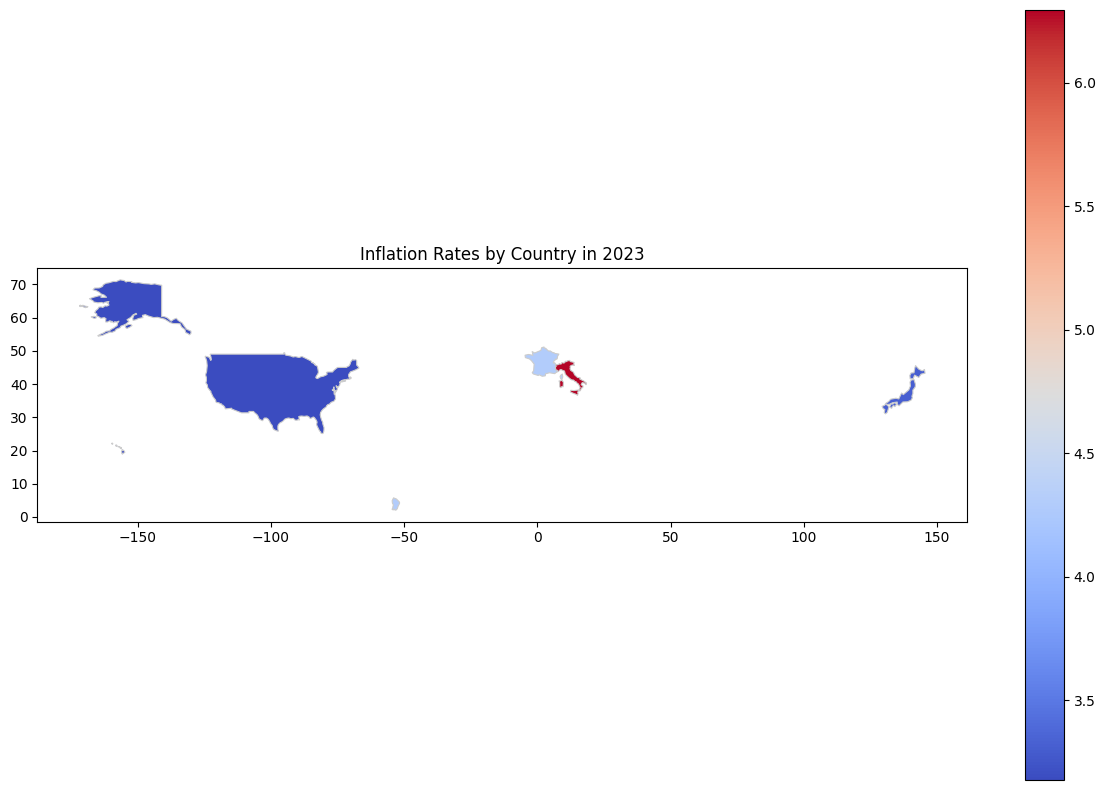

In [48]:
# Sample inflation data (replace with your actual data)
inflation_data = [
    {"Country": "Japan", "InflationRate": inflation_rate_jp},
    {"Country": "France", "InflationRate": inflation_rate_fr},
    {"Country": "Italy", "InflationRate": inflation_rate_it},
    {"Country": "United States of America", "InflationRate": inflation_rate_us}
]

# Create a DataFrame from the inflation data
inflation_df = pd.DataFrame(inflation_data)

# Merge the inflation data with the world GeoDataFrame
world = world.merge(inflation_df, left_on='name', right_on='Country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='InflationRate', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Inflation Rates by Country in 2023')
plt.savefig("figure_of_Inflation.png")
plt.show()

In [40]:
inflation_data

[{'Country': 'Japan', 'InflationRate': 3.323558162267845},
 {'Country': 'France', 'InflationRate': 4.288119075042074},
 {'Country': 'Italy', 'InflationRate': 6.294326241134759},
 {'Country': 'United States of America', 'InflationRate': 3.1777801779421764}]